## Report: act_report

### Overview
WeRateDogs, @dog_rates, a Twitter account that rated dogs pictures with the participation of users with a humorous comment about the dog picture. People rated dogs with a denominator of 10 and a numerator usually above 15 points based on how cute is the dog. 

The aim of this project is to create an interesting and trustworthy analysis and visualizations about the datasets that will be gathered. Focusing on Data Wrangling, using Python libraries, gathering data from a variety of sources and in a variety of formats, assess its quality and tidiness, and cleaning the data. 

### Analyzing and Visualizing Data
### Insights:

1. What is the distribution of favorite_count, retweet_count, and source? 
2. Do favorite_count and retweet_count have any correlation? 
3. Which dog stage have more engagement in terms of favorites and retweets? 
4. What are the best dog breed best rated? 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import random

In [2]:
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')

#### 1. What is the distribution of favorite_count, retweet_count, and source? 

Text(0.5, 1.0, 'Retweets Distribution')

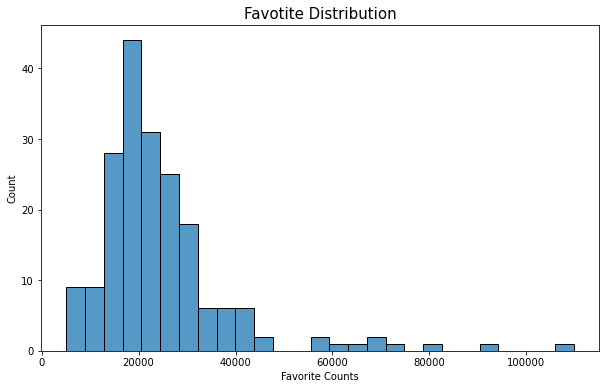

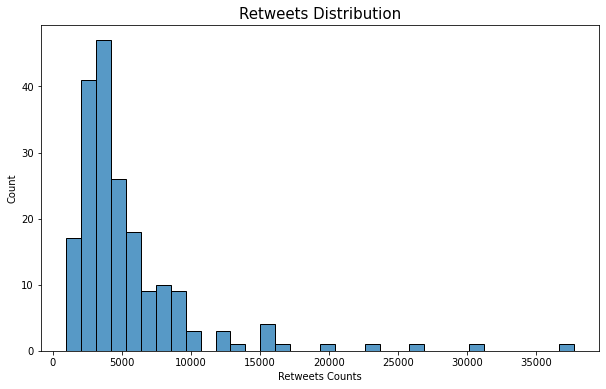

In [3]:
# Favorite and Retweet Distributions
plt.figure(figsize=(10,6))
sns.histplot(twitter_archive_master.favorite_count);
plt.xlabel("Favorite Counts")
plt.title("Favotite Distribution", size=15)
plt.figure(figsize=(10,6))
sns.histplot(twitter_archive_master.retweet_count);
plt.xlabel("Retweets Counts")
plt.title("Retweets Distribution", size=15)

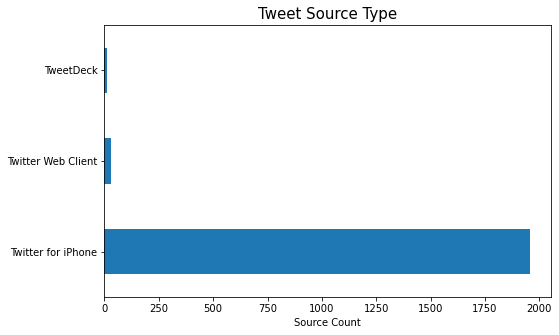

In [4]:
source = twitter_archive_master['source'].value_counts()
source
plt.figure(figsize=(8,5))
source.plot.barh()
plt.title("Tweet Source Type", size=15)
plt.xlabel("Source Count");

* favorite_count and retweet_count seems to have a pretty normal distribution. 
* The most common source is Twitter for Iphone

#### 2. Do favorite_count and retweet_count have any correlation? 

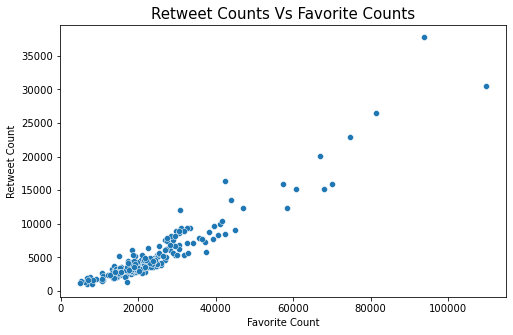

In [5]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='favorite_count', y='retweet_count', data=twitter_archive_master)
plt.title("Retweet Counts Vs Favorite Counts", size=15)
plt.ylabel("Retweet Count")
plt.xlabel("Favorite Count");

* It is very clear that favorite_count and retweet_counts have a positive correlation.

#### 3. Which dog stage have more engagement in terms of favorites and retweets? 


Text(0.5, 1.0, 'Favorite and Retweet Count')

<Figure size 720x432 with 0 Axes>

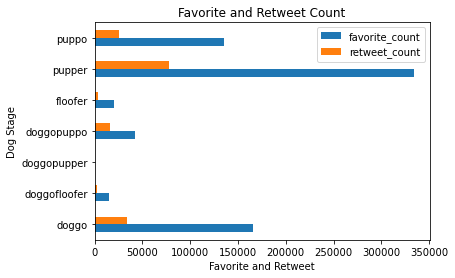

In [6]:
favorite_dogstage = twitter_archive_master.groupby(['dog_stage'])[['favorite_count', 'retweet_count']].sum()
plt.figure(figsize=(10,6))
favorite_dogstage.plot.barh()
plt.xlabel("Favorite and Retweet")
plt.ylabel("Dog Stage")
plt.title("Favorite and Retweet Count")

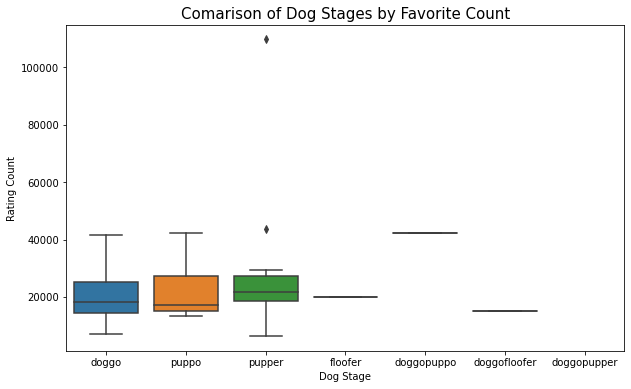

In [7]:
stage = twitter_archive_master[twitter_archive_master['dog_stage'].notnull()]
stage_rating = stage[['dog_stage', 'favorite_count']]

plt.figure(figsize=(10,6))
sns.boxplot(x="dog_stage", y="favorite_count", data=stage_rating)
plt.title("Comarison of Dog Stages by Favorite Count", size=15)
plt.xlabel('Dog Stage')
plt.ylabel('Rating Count');

* Pupper is the dog stage best rated, on second place we have puppo, on third place doggo, and finally floofer.

#### 4. What are the best dog breed best rated? 

In [8]:
# this function will clasiffy by dog breeds in a new column called 'dog_breed'
def breed_pred(row):
    '''This function clasifies dog breed by 1st, 2nd or 3rd prediction'''
    if row['p1_dog']:
        return row['p1']
    elif row['p2_dog']:
        return row['p2']
    elif row['p3_dog']:
        return row['p3']
    else:
        return np.nan

twitter_archive_master['dog_breed'] = twitter_archive_master.apply(breed_pred, axis = 1)

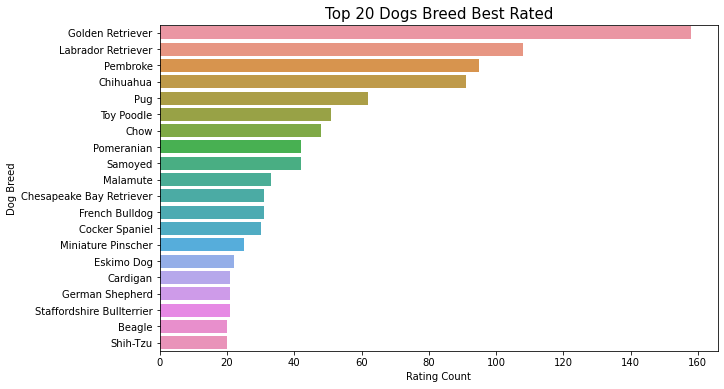

In [9]:
plt.figure(figsize=(10,6))
breed = twitter_archive_master.groupby(['dog_breed'], as_index=False)['rating_numerator'].count()
sns.barplot(x = 'rating_numerator', y = 'dog_breed', data=breed.nlargest(20, 'rating_numerator'))
plt.title("Top 20 Dogs Breed Best Rated", size=15)
plt.xlabel('Rating Count')
plt.ylabel('Dog Breed');

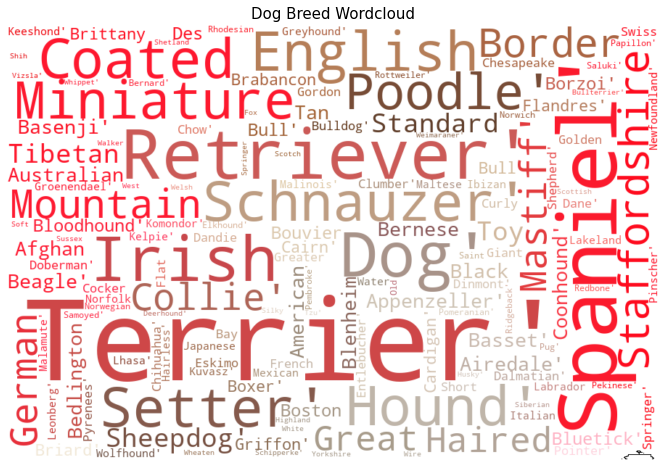

In [10]:
image_mask = np.array(Image.open('dog.jpeg'))
image_colors = ImageColorGenerator(image_mask)

text = (str(breed['dog_breed'].tolist()))
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', max_words=1000,
                      mask=image_mask, width=1500, height=1200, contour_width=.01, 
                      contour_color='black', colormap = 'bone').generate(text)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud.recolor(color_func=image_colors, random_state=3), interpolation='bilinear')
plt.title('Dog Breed Wordcloud', fontsize=15)
plt.axis('off');

* We can see that the golden retriever, labrador retriever, pembroke, chihuahua, are pug are top 5 best dog breed rated.